In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df=pd.read_csv('AirPassengers (2).csv')

In [3]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
df['Month']=pd.to_datetime(df['Month'])
df.index=df['Month']
df['Month']
del df['Month']

In [8]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

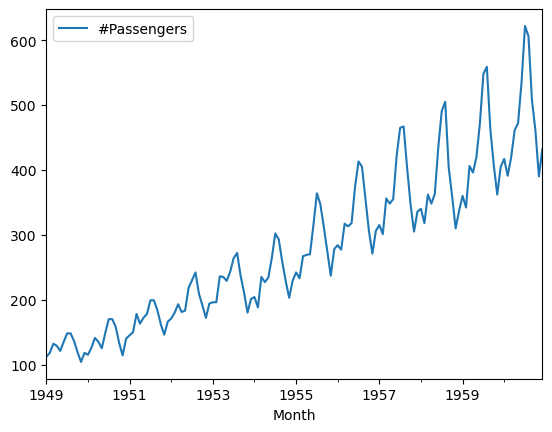

In [10]:
df.plot()

In [11]:
# Conversion of non-stationary data into a stationary is done by the removal of noise from time series data

In [12]:
# Method- I

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation plot')

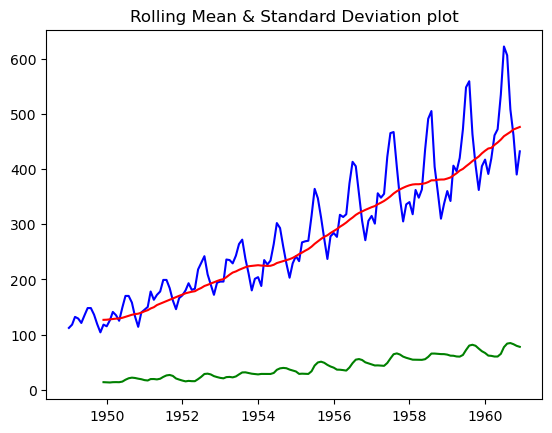

In [13]:
mean_log=df.rolling(window=12).mean() # Rolling mean method
std_log=df.rolling(window=12).std()   # Rolling Std. Deviation Method

plt.plot(df,color='blue',label='Original')

plt.plot(mean_log,color='red',label='Rolling Mean')

plt.plot(std_log,color='green',label='Rolling Standard')

plt.title('Rolling Mean & Standard Deviation plot')

In [14]:
# Method-II.

In [15]:
# checking the stationarity of the time series data
# adfuller - Augmented Dickey Fuller

from statsmodels.tsa.stattools import adfuller
result=adfuller(df['#Passengers'])
print(result)

(0.8153688792060423, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)


In [16]:
# Method-III

<Axes: xlabel='Month'>

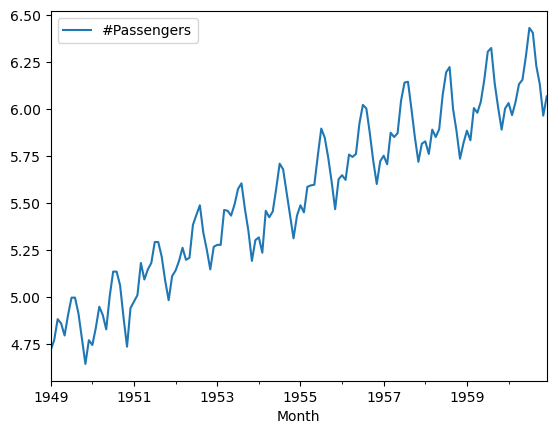

In [17]:
# logarithmic computation to make the time series data stationary

first_log=np.log(df)
first_log=first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation plot')

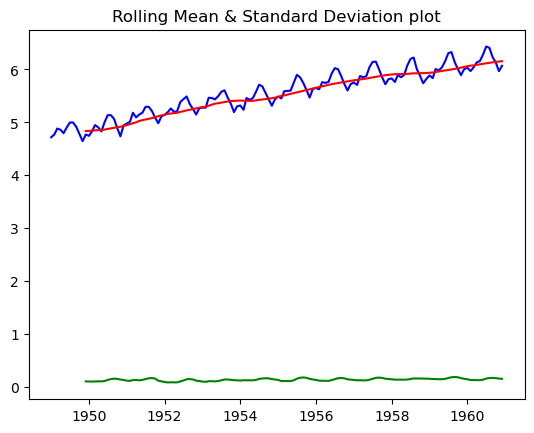

In [18]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()


plt.plot(first_log,color='blue',label='Original')

plt.plot(mean_log,color='red',label='Rolling Mean')

plt.plot(std_log,color='green',label='Rolling Standard')

plt.title('Rolling Mean & Standard Deviation plot')

<Axes: xlabel='Month'>

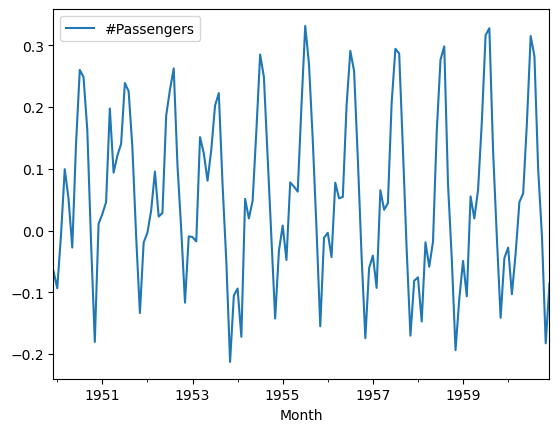

In [19]:
# first_log is the variable giving the plot for the original time series data after normalizaing it using log method
# mean_log to check the stationarity
# first_log and mean_log difference

new_data= first_log - mean_log
new_data=new_data.dropna()
new_data.plot()

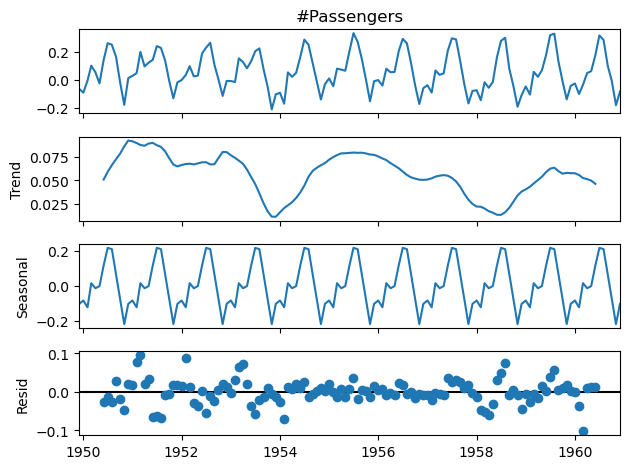

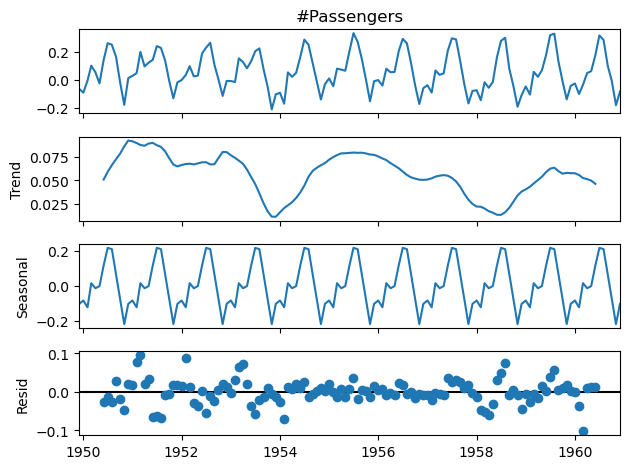

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(new_data['#Passengers'].dropna())
decompose_result.plot()

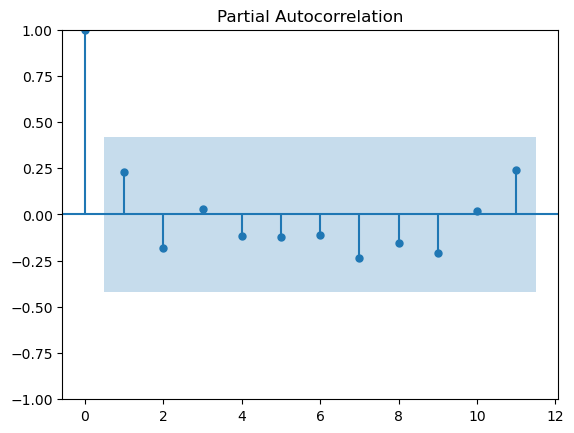

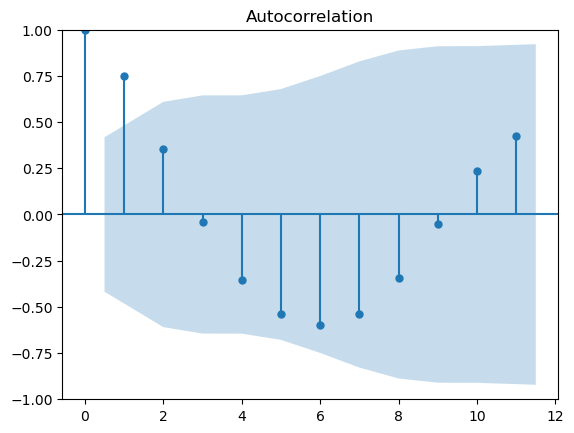

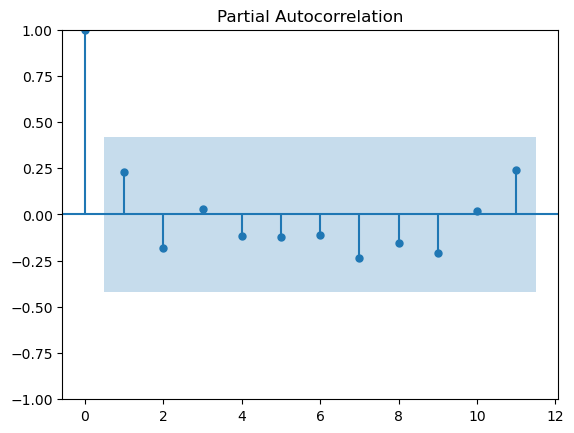

In [21]:
# p - past data (AR- Auto Regression) / measures the correlation between a time series and its own lagged values
# d - differencing (I - Integration) / will be number of time we taken difference
# q - error (MA - Moving Average) / identify the direct relationship between observations at different lags while removing the indirect effects of shorter lags

# p - autocorrelation (acf)
# q - partial autocorrelation (pacf)

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


acf_plot=acf(new_data)

pacf_plot=pacf(new_data)

plot_acf(acf_plot)

plot_pacf(pacf_plot)

# value of p is the value on x axis decided by the first positive plot lying in the confidence interval (output from y axis)
# value of d is the number of times differences as calculated to make the time series data stationary
# value of q is the value on x axis decided by the first negative plot  (output from x axis)

In [22]:
train=new_data.iloc[:120]['#Passengers']
test=new_data.iloc[121:]['#Passengers']

In [23]:
from statsmodels.tsa.arima.model import ARIMA


model=ARIMA(train,order=(1,0,2))
model=model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

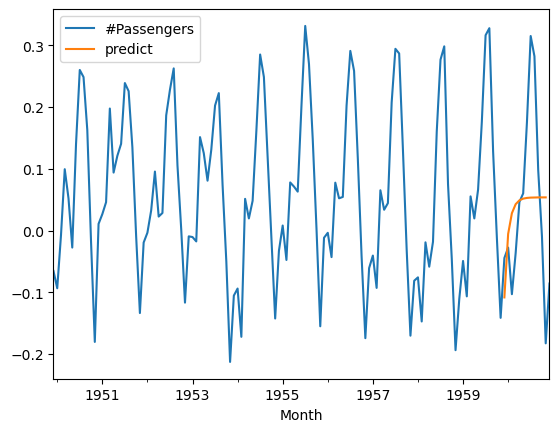

In [24]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

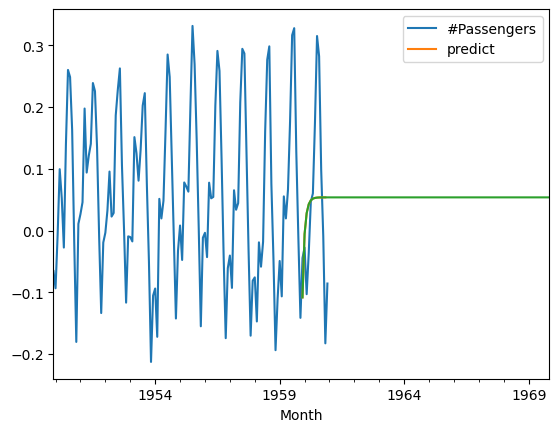

In [25]:
# predicting the projections for the next few years

forecast=model.forecast(steps=120)
new_data.plot()
forecast.plot()

In [26]:
# SARIMAX MODEL

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model=model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

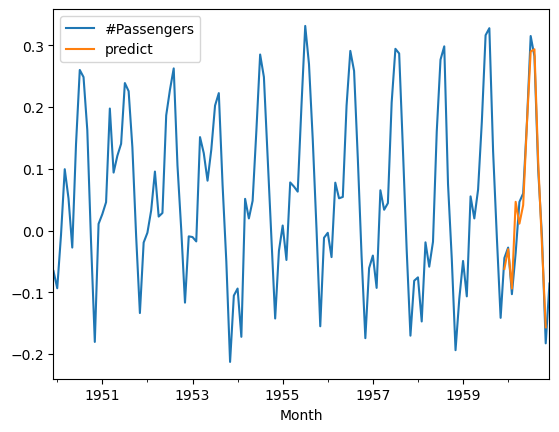

In [28]:
new_data['predict']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

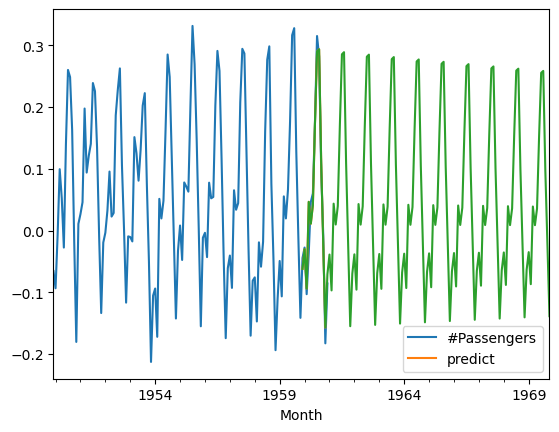

In [29]:
# predicting the projections for the next few years

forecast=model.forecast(steps=120)
new_data.plot()
forecast.plot()